## Questions 

##### Product Analysis:

###### Most Popular Products

- Identify the most popular products based on the 'Quantity Ordered' column.
- Determine the average price and total revenue generated for each product.

##### Time Analysis:

###### Sales Trends

- Analyze how sales trends vary across different time periods (hourly, monthly, yearly).
- Identify the busiest hours, months, and years for sales.
- Investigate whether certain products tend to sell more during specific months or times of day.

##### Geographical Analysis:

###### Sales Distribution by City

- Explore the sales distribution by city to identify regions with higher sales.
- Analyze whether certain products are more popular in specific cities.

##### Seasonal Analysis:

###### Sales Trends by Season

- Analyze how sales trends vary by season using the 'Season' column.
- Identify which products are more popular in different seasons.

##### Price Analysis:

###### Price-Quantity Relationship

- Investigate the relationship between the price of a product and the quantity ordered.
- Analyze whether higher-priced items tend to have different sales frequencies.

##### Total Revenue Analysis:

###### Total Revenue Variation

- Calculate and visualize the total revenue generated over different time periods.
- Identify which products contribute the most to the total revenue.

##### Time of Day Analysis:

###### Sales Patterns by Time of Day

- Analyze whether there's a noticeable sales pattern based on the time of day.
- Determine if specific hours consistently experience higher sales.

##### Monthly Analysis:

###### Sales Growth Patterns

- Investigate patterns or trends in sales growth over the months.
- Identify the months with the highest and lowest sales.

##### Yearly Analysis:

###### Year-over-Year Sales

- Analyze whether there's significant sales growth from year to year.
- Identify the years with the highest and lowest sales.

##### Customer Insights:

###### Order Quantity and Customer Type

- Explore if there's a correlation between order quantity and customer type (new vs. returning customers).

##### Correlation Analysis:

###### Numeric Column Correlations

- Calculate correlations between different numerical columns (e.g., 'Quantity Ordered', 'Price', 'TotalPrice').
- Analyze whether there's a relationship between these variables.

##### Visualizations:

###### Effective Data Representation

- Explore how visualizations like line charts, bar graphs, scatter plots, and heatmaps can effectively represent the insights obtained.


## Load Packages

In [154]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [155]:
df=pd.read_csv('Sales.csv')

In [156]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700$,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0$,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95$,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99$,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95$,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [157]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [158]:
df.shape

(25117, 6)

In [159]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,25037,25037,25037,25117,25037,25037
unique,24007,20,8,20,17306,23215
top,Order ID,USB-C Charging Cable,1,11.95$,Order Date,Purchase Address
freq,48,2981,22641,2981,48,48


In [160]:
df.isnull().sum()/len(df)*100

Order ID            0.318509
Product             0.318509
Quantity Ordered    0.318509
Price Each          0.000000
Order Date          0.318509
Purchase Address    0.318509
dtype: float64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25117 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          25037 non-null  object
 1   Product           25037 non-null  object
 2   Quantity Ordered  25037 non-null  object
 3   Price Each        25117 non-null  object
 4   Order Date        25037 non-null  object
 5   Purchase Address  25037 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


# Data Cleaning

In [162]:
# order Id
df['Order ID'].unique()

array(['295665', '295666', '295667', ..., '319668', '319669', '319670'],
      dtype=object)

In [163]:
df['Order ID'].value_counts()

Order ID
Order ID    48
312462       4
304802       4
296353       4
312407       4
            ..
303833       1
303832       1
303831       1
303830       1
319670       1
Name: count, Length: 24007, dtype: int64

In [164]:
df['Order ID'].nunique()

24007

In [165]:
df['Order ID'].isnull().sum()

80

In [166]:
df['Order ID'].dtypes

dtype('O')

In [167]:
# convert order ID to numerical columns
df['Order ID']=pd.to_numeric(df['Order ID'],errors='coerce')

In [168]:
#drop the missing values 
# df.dropna(subset=['Order ID'],inplace=True)
# knowing the index of missing value in order ID
df[df['Order ID'].isnull()].index.tolist()

[254,
 264,
 648,
 680,
 705,
 1101,
 1385,
 1495,
 2129,
 2220,
 2875,
 3044,
 3242,
 3373,
 3422,
 3516,
 3708,
 3763,
 3793,
 3812,
 3865,
 4125,
 4218,
 4691,
 4783,
 4792,
 4936,
 5143,
 5293,
 5650,
 5902,
 6178,
 6608,
 6731,
 6752,
 7045,
 7367,
 7441,
 7499,
 7704,
 7738,
 7781,
 8094,
 8190,
 8251,
 8652,
 8663,
 8951,
 9119,
 10386,
 10417,
 10489,
 10574,
 10717,
 10745,
 11461,
 11491,
 11522,
 11545,
 11547,
 11616,
 11768,
 12316,
 12336,
 12400,
 12410,
 12478,
 12516,
 12561,
 12673,
 13093,
 13099,
 13161,
 13238,
 13260,
 13628,
 14329,
 14831,
 15346,
 15991,
 16011,
 16460,
 16573,
 16787,
 17012,
 17085,
 17726,
 17960,
 18062,
 18648,
 18810,
 19074,
 19146,
 19326,
 19422,
 19478,
 19580,
 19709,
 19896,
 19898,
 20041,
 20134,
 20172,
 20318,
 20398,
 20549,
 20769,
 20811,
 20814,
 20986,
 21065,
 21148,
 21549,
 22054,
 22295,
 22300,
 22375,
 22906,
 22945,
 22962,
 23198,
 23309,
 23337,
 23748,
 23996,
 24192,
 24222,
 24730]

In [169]:
# fill the missing values
df.fillna(method='ffill',inplace=True)

In [170]:
df['Order ID'].isnull().sum()

0

In [171]:
# product Analysis 

In [172]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'Product', 'LG Dryer'],
      dtype=object)

In [173]:
len(df['Product'].unique())

20

In [174]:
product_counts = df['Product'].value_counts().sort_values(ascending=False)

In [175]:
import plotly.express as px
# df['Product'].value_counts().plot(kind='bar')
px.bar(x=product_counts.index, y=product_counts.values, color=product_counts.index ,title='Product Counts', labels={'x': 'Product', 'y': 'Count'})

### we see that the more selled item was usb-type c then lighten charging cable then batteries 

In [176]:
df["Product"].isna().sum()

0

In [177]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [178]:
# Quantity Ordered
df['Quantity Ordered'].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6'],
      dtype=object)

In [179]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [180]:
df['Quantity Ordered'].value_counts()

Quantity Ordered
1                   22710
2                    1802
3                     398
4                     110
Quantity Ordered       48
5                      30
6                      16
7                       3
Name: count, dtype: int64

In [181]:
# rename Price Each to Price/each
df.rename(columns={'Price Each':'Price/each'},inplace=True)


In [182]:
df['Price/each'].dtype

dtype('O')

In [183]:
# convert Price to numeric values   
float(df['Price/each'][0][:-1])


1700.0

In [184]:
import re
df['Price'] = df['Price/each'].apply(lambda x: re.sub(r'[^\d.]', '', x))

In [185]:
df['Price'].isnull().sum()

0

In [186]:
df['Price'].dtype

dtype('O')

In [187]:
# convert Price to numeric values
df['Price']=pd.to_numeric(df['Price'],errors='coerce')

In [188]:
df[df['Price']>150].head()

,Order ID,Product,Quantity Ordered,Price/each,Order Date,Purchase Address,Price
0,295665.0,Macbook Pro Laptop,1,1700$,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666.0,LG Washing Machine,1,600.0$,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
11,295676.0,ThinkPad Laptop,1,999.99$,12/28/19 17:19,"410 Lincoln St, Los Angeles, CA 90001",999.99
16,295681.0,Google Phone,1,600$,12/25/19 12:37,"79 Elm St, Boston, MA 02215",600.00
27,295689.0,LG Washing Machine,1,600.0$,12/24/19 11:21,"173 Lake St, San Francisco, CA 94016",600.00


In [189]:
#drop Price/each	
df.drop('Price/each',axis=1,inplace=True)

In [190]:
df.head()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price
0,295665.0,Macbook Pro Laptop,1,12/30/19 00:01,"136 Church St, New York City, NY 10001",1700.00
1,295666.0,LG Washing Machine,1,12/29/19 07:03,"562 2nd St, New York City, NY 10001",600.00
2,295667.0,USB-C Charging Cable,1,12/12/19 18:21,"277 Main St, New York City, NY 10001",11.95
3,295668.0,27in FHD Monitor,1,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",149.99
4,295669.0,USB-C Charging Cable,1,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",11.95


In [191]:
# Order Date	
df['Order Date'].unique()

array(['12/30/19 00:01', '12/29/19 07:03', '12/12/19 18:21', ...,
       '12/01/19 12:01', '12/09/19 06:43', '12/03/19 10:39'], dtype=object)

In [192]:
df['Order Date'][254]

'Order Date'

In [193]:
df.rename(columns={'Order Date':'Order_Date'},inplace=True)

In [194]:
set(entry[0] for entry in df['Order_Date'])

{'0', '1', 'O'}

### so I have in the data not digit value begin with O 

In [195]:
def find_indices_with_O(series):
    indices_with_o = series.index[series.str.contains('O')]
    return indices_with_o

In [196]:
indices_with_o = find_indices_with_O(df['Order_Date'])
print(indices_with_o)

Index([  254,   705,  1101,  2875,  3708,  3793,  3812,  4218,  5143,  5293,
        6608,  6752,  7367,  7704,  7781,  8094, 10417, 11522, 11545, 11616,
       12336, 12516, 12673, 13161, 16573, 16787, 17012, 17085, 18648, 19074,
       19326, 19478, 19580, 19709, 20041, 20318, 20398, 20549, 20986, 21148,
       21549, 22054, 22375, 23198, 23337, 23748, 24192, 24222],
      dtype='int64')


In [197]:
df['Order_Date'][indices_with_o]

254      Order Date
705      Order Date
1101     Order Date
2875     Order Date
3708     Order Date
3793     Order Date
3812     Order Date
4218     Order Date
5143     Order Date
5293     Order Date
6608     Order Date
6752     Order Date
7367     Order Date
7704     Order Date
7781     Order Date
8094     Order Date
10417    Order Date
11522    Order Date
11545    Order Date
11616    Order Date
12336    Order Date
12516    Order Date
12673    Order Date
13161    Order Date
16573    Order Date
16787    Order Date
17012    Order Date
17085    Order Date
18648    Order Date
19074    Order Date
19326    Order Date
19478    Order Date
19580    Order Date
19709    Order Date
20041    Order Date
20318    Order Date
20398    Order Date
20549    Order Date
20986    Order Date
21148    Order Date
21549    Order Date
22054    Order Date
22375    Order Date
23198    Order Date
23337    Order Date
23748    Order Date
24192    Order Date
24222    Order Date
Name: Order_Date, dtype: object

In [198]:
# make indices_with_o as nan value
df['Order_Date'][indices_with_o]=pd.NaT

/var/folders/5p/l5wtn689683b0lk5256mt0lm0000gn/T/ipykernel_2343/1356496696.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
df['Order_Date'][254]

NaT

In [200]:
df['Order_Date'].isnull().sum()

48

In [201]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [202]:
df['Order_Date'].interpolate(method='linear',inplace=True)

In [203]:
df['Order_Date'][254]

Timestamp('2019-12-16 08:58:00')

In [204]:
df['Order_Date'].isnull().sum()

0

In [205]:
import datetime
df['Order_Date']=pd.to_datetime(df['Order_Date'],format='%m/%d/%y %H:%M')
df['hour']=pd.to_datetime(df['Order_Date']).dt.hour
df['Month']=pd.to_datetime(df['Order_Date']).dt.month
df['Year']=pd.to_datetime(df['Order_Date']).dt.year
df['Day']=pd.to_datetime(df['Order_Date']).dt.day_name()
df['Month_name']=pd.to_datetime(df['Order_Date']).dt.month_name()

In [206]:
df.head()

,Order ID,Product,Quantity Ordered,Order_Date,Purchase Address,Price,hour,Month,Year,Day,Month_name
0,295665.0,Macbook Pro Laptop,1,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,0,12,2019,Monday,December
1,295666.0,LG Washing Machine,1,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,7,12,2019,Sunday,December
2,295667.0,USB-C Charging Cable,1,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,18,12,2019,Thursday,December
3,295668.0,27in FHD Monitor,1,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,15,12,2019,Sunday,December
4,295669.0,USB-C Charging Cable,1,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,12,2019,Wednesday,December


In [207]:
#Purchase Address	
# I need to make a new featue that extract city to make a visuallsation
df['Purchase Address'].unique()

array(['136 Church St, New York City, NY 10001',
       '562 2nd St, New York City, NY 10001',
       '277 Main St, New York City, NY 10001', ...,
       '273 Wilson St, Seattle, WA 98101',
       '778 River St, Dallas, TX 75001',
       '747 Chestnut St, Los Angeles, CA 90001'], dtype=object)

### Extract City Name 

In [208]:
df['Purchase Address'].isnull().sum()

0

In [209]:
# Define a regular expression pattern to extract the city name
city_pattern = r',\s*([^,]+),\s*[A-Z]{2}\s*\d{5}'

# Extract city names using regular expression and create a new column 'City'
df['City'] = df['Purchase Address'].apply(lambda address: re.search(city_pattern, address).group(1) if re.search(city_pattern, address) else None)

# Print the DataFrame with extracted city names
df['City'].value_counts()

City
San Francisco    6034
Los Angeles      3907
New York City    3419
Boston           2712
Dallas           2015
Atlanta          1996
Seattle          1982
Portland         1651
Austin           1353
Name: count, dtype: int64

### Data Analysis

In [210]:
df.head()

,Order ID,Product,Quantity Ordered,Order_Date,Purchase Address,Price,hour,Month,Year,Day,Month_name,City
0,295665.0,Macbook Pro Laptop,1,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,0,12,2019,Monday,December,New York City
1,295666.0,LG Washing Machine,1,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,7,12,2019,Sunday,December,New York City
2,295667.0,USB-C Charging Cable,1,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,18,12,2019,Thursday,December,New York City
3,295668.0,27in FHD Monitor,1,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,15,12,2019,Sunday,December,San Francisco
4,295669.0,USB-C Charging Cable,1,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,12,2019,Wednesday,December,Atlanta


In [211]:
df.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Order_Date            0
Purchase Address      0
Price               128
hour                  0
Month                 0
Year                  0
Day                   0
Month_name            0
City                 48
dtype: int64

In [212]:
df['Price'].isnull().sum()

128

In [213]:
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=2)
# fill missing to ratinr 
df['Price'] = imputer.fit_transform(df[['Price']])

In [214]:
df['Price'].isnull().sum()

0

In [215]:
df.isnull().sum()

Order ID             0
Product              0
Quantity Ordered     0
Order_Date           0
Purchase Address     0
Price                0
hour                 0
Month                0
Year                 0
Day                  0
Month_name           0
City                48
dtype: int64

In [216]:
df[df['City'].isnull()]
# drop the missing values
df.dropna(subset=['City'],inplace=True)

In [217]:
df['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [218]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Order_Date          0
Purchase Address    0
Price               0
hour                0
Month               0
Year                0
Day                 0
Month_name          0
City                0
dtype: int64

In [219]:
import plotly.express as px

In [220]:
px.bar(x=df['Product'].value_counts().index, y=df['Product'].value_counts().values, color=df['Product'].value_counts().index ,title='Product Counts', labels={'x': 'Product', 'y': 'Count'})

### The highest products selles in USA in 2019 were USB-C , Lighten Charging Cable and Batteries 

In [221]:
px.bar(x=df['City'].value_counts().index, y=df['City'].value_counts().values, color=df['City'].value_counts().index ,title='City Counts', labels={'x': 'City', 'y': 'Count'})

### San Francisco and Los Angeles were the most consumer state in 2019

In [222]:
px.bar(x=df['Month_name'].value_counts().index, y=df['Month_name'].value_counts().values, color=df['Month_name'].value_counts().index ,title='Month Counts', labels={'x': 'Month', 'y': 'Count'})

### December are highest month consumers buy

In [223]:
df['Month_name'].value_counts()

Month_name
December    25035
January        34
Name: count, dtype: int64

In [224]:
px.bar(x=df['Day'].value_counts().index, y=df['Day'].value_counts().values, color=df['Day'].value_counts().index ,title='Day Counts', labels={'x': 'Day', 'y': 'Count'})

### Monday , Tuesday and Sunday are highest days have percentage in sales

In [225]:
px.bar(x=df['Year'].value_counts().index, y=df['Year'].value_counts().values, color=df['Year'].value_counts().index ,title='Year Counts', labels={'x': 'Year', 'y': 'Count'})

### Dataset I work on is for year 2019

In [226]:
px.bar(x=df['hour'].value_counts().index, y=df['hour'].value_counts().values, color=df['hour'].value_counts().index ,title='Hour Counts', labels={'x': 'Hour', 'y': 'Count'})

### Time from 4 pm to 10 pm have the most sales

In [227]:
pd.cut(df['Price'],bins=5).value_counts()

Price
(1.293, 342.392]        20104
(342.392, 681.794]       2872
(681.794, 1021.196]      1449
(1360.598, 1700.0]        644
(1021.196, 1360.598]        0
Name: count, dtype: int64

In [228]:
# make timeofday analysis by pd .cut
df['TimeOfDay'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], include_lowest=True)


In [229]:
# make agraph for timeofday
px.bar(x=df['TimeOfDay'].value_counts().index, y=df['TimeOfDay'].value_counts().values, color=df['TimeOfDay'].value_counts().index ,title='TimeOfDay Counts', labels={'x': 'TimeOfDay', 'y': 'Count'})

### Afternoon and morning have highest sales

In [230]:
# season analysis
df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'], include_lowest=True)

In [231]:
px.bar(x=df['Season'].value_counts().index, y=df['Season'].value_counts().values, color=df['Season'].value_counts().index ,title='Season Counts', labels={'x': 'Season', 'y': 'Count'})

### Fall and Winter have the higher sales in 2019

In [232]:
# convert Quality to numeric value
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],errors='coerce')

In [233]:
# make a new feature for total price
df['TotalPrice']=df['Price']*df['Quantity Ordered']

In [234]:
# make a pivot table for month and total price
df.pivot_table(index='Day',values='TotalPrice',aggfunc='sum')

,TotalPrice
Day,
Friday,594258.107801
Monday,766791.086051
Saturday,572432.202151
Sunday,737161.790851
Thursday,585596.053002
Tuesday,749133.332151
Wednesday,631206.039101


In [235]:
df.pivot_table(index='Month_name',values='TotalPrice',aggfunc='sum')

,TotalPrice
Month_name,
December,4.627908e+06
January,8.670290e+03


In [236]:
df.pivot_table(index='Product',values='Price').sort_values(by='Price',ascending=False)

,Price
Product,
Macbook Pro Laptop,1692.969918
ThinkPad Laptop,996.983943
iPhone,699.432173
LG Washing Machine,600.000000
Google Phone,600.000000
LG Dryer,595.216617
Vareebadd Phone,398.493698
27in 4K Gaming Monitor,388.798414
34in Ultrawide Monitor,378.837566


### The highest mean price were for Macbook Pro and Laptop and iphone so the Technology Items are logic to have higher prices

In [237]:
df.Product.value_counts()


Product
USB-C Charging Cable          2992
Lightning Charging Cable      2903
AAA Batteries (4-pack)        2841
AA Batteries (4-pack)         2725
Wired Headphones              2551
Apple Airpods Headphones      2063
Bose SoundSport Headphones    1813
27in FHD Monitor               966
iPhone                         909
27in 4K Gaming Monitor         865
34in Ultrawide Monitor         851
Google Phone                   715
Flatscreen TV                  663
Macbook Pro Laptop             647
20in Monitor                   568
ThinkPad Laptop                543
Vareebadd Phone                287
LG Dryer                        87
LG Washing Machine              80
Name: count, dtype: int64

In [238]:
# Calculate the mean price for each product
mean_prices = df.groupby('Product')['Price'].mean()

In [239]:
mean_prices

Product
20in Monitor                   109.990000
27in 4K Gaming Monitor         388.798414
27in FHD Monitor               150.130189
34in Ultrawide Monitor         378.837566
AA Batteries (4-pack)            4.368457
AAA Batteries (4-pack)           3.626592
Apple Airpods Headphones       150.065624
Bose SoundSport Headphones     100.221262
Flatscreen TV                  299.824805
Google Phone                   600.000000
LG Dryer                       595.216617
LG Washing Machine             600.000000
Lightning Charging Cable        15.473617
Macbook Pro Laptop            1692.969918
ThinkPad Laptop                996.983943
USB-C Charging Cable            12.581969
Vareebadd Phone                398.493698
Wired Headphones                12.596312
iPhone                         699.432173
Name: Price, dtype: float64

In [240]:
px.bar(x=mean_prices.index, y=mean_prices.values, color=mean_prices.index ,title='Product and Price', labels={'x': 'Product', 'y': 'Price'})

### The highest mean price were for Macbook Pro and Laptop and iphone so the Technology Items are logic to have higher prices

In [241]:
df.head()

,Order ID,Product,Quantity Ordered,Order_Date,Purchase Address,Price,hour,Month,Year,Day,Month_name,City,TimeOfDay,Season,TotalPrice
0,295665.0,Macbook Pro Laptop,1,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,0,12,2019,Monday,December,New York City,Night,Fall,1700.00
1,295666.0,LG Washing Machine,1,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,7,12,2019,Sunday,December,New York City,Morning,Fall,600.00
2,295667.0,USB-C Charging Cable,1,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,18,12,2019,Thursday,December,New York City,Afternoon,Fall,11.95
3,295668.0,27in FHD Monitor,1,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,15,12,2019,Sunday,December,San Francisco,Afternoon,Fall,149.99
4,295669.0,USB-C Charging Cable,1,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,12,2019,Wednesday,December,Atlanta,Morning,Fall,11.95


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25069 entries, 0 to 25116
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          25069 non-null  float64       
 1   Product           25069 non-null  object        
 2   Quantity Ordered  25069 non-null  int64         
 3   Order_Date        25069 non-null  datetime64[ns]
 4   Purchase Address  25069 non-null  object        
 5   Price             25069 non-null  float64       
 6   hour              25069 non-null  int32         
 7   Month             25069 non-null  int32         
 8   Year              25069 non-null  int32         
 9   Day               25069 non-null  object        
 10  Month_name        25069 non-null  object        
 11  City              25069 non-null  object        
 12  TimeOfDay         25069 non-null  category      
 13  Season            25069 non-null  category      
 14  TotalPrice        25069 non

In [243]:
numerical_columns = ['Quantity Ordered', 'Price', 'TotalPrice']
correlation_matrix = df[numerical_columns].corr()

print(correlation_matrix)

                  Quantity Ordered     Price  TotalPrice
Quantity Ordered          1.000000 -0.148236   -0.139020
Price                    -0.148236  1.000000    0.999481
TotalPrice               -0.139020  0.999481    1.000000


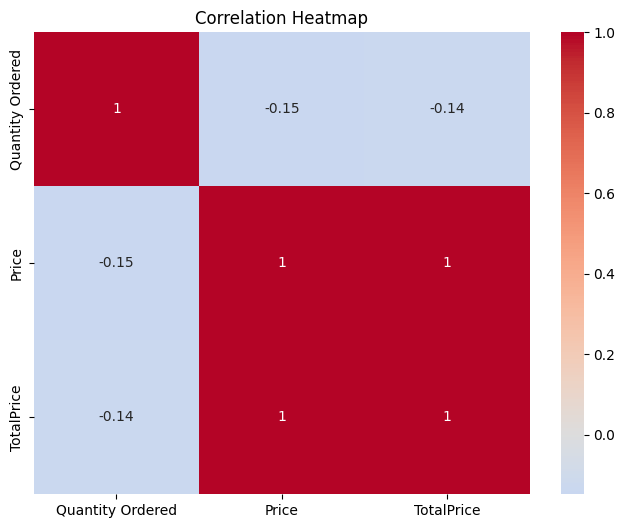

In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (assuming you have a DataFrame named 'df')
# Include only the relevant numerical columns for correlation analysis
numerical_columns = ['Quantity Ordered', 'Price', 'TotalPrice']
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


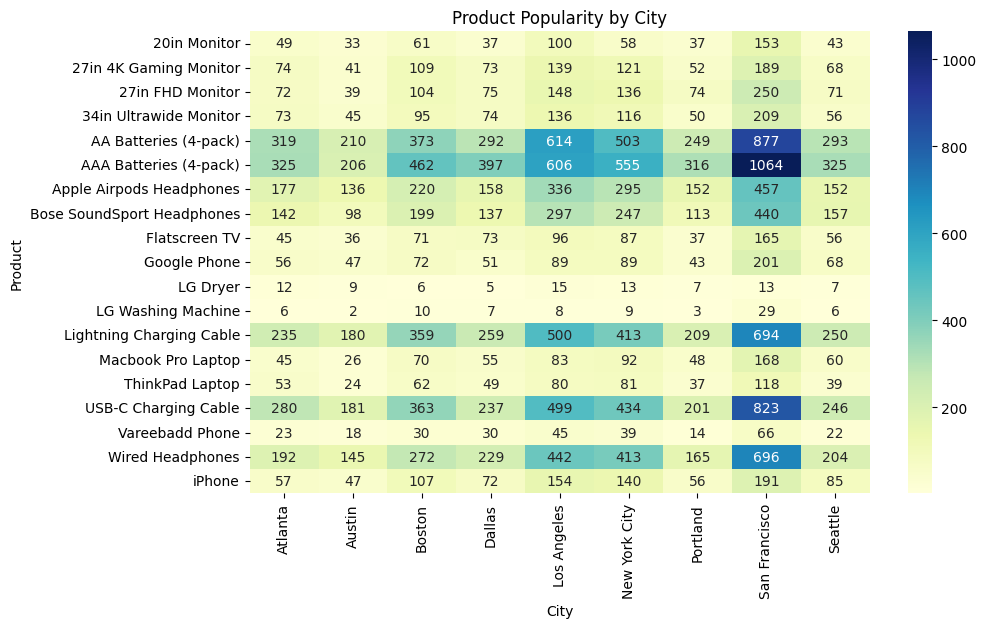

In [245]:
# Group by 'Product' and 'City' and calculate sum of 'Quantity Ordered'
product_city_group = df.groupby(['Product', 'City'])['Quantity Ordered'].sum().reset_index()

# Pivot the table for better visualization
pivot_table = product_city_group.pivot(index='Product', columns='City', values='Quantity Ordered')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Product Popularity by City')
plt.show()

### from above I can determine which item have the highest sales 

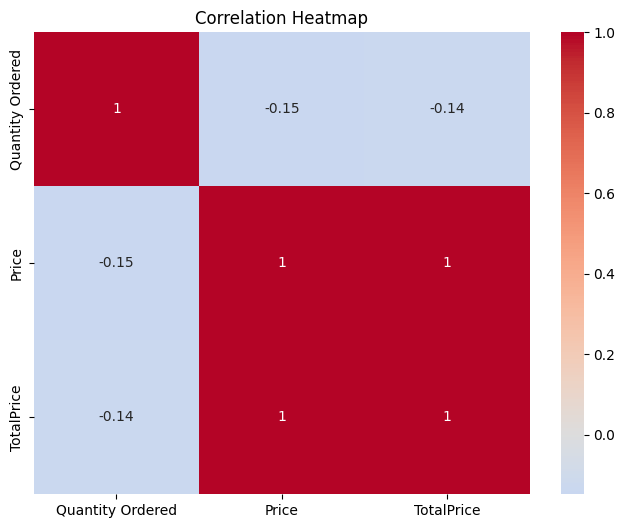

In [246]:
numerical_columns = ['Quantity Ordered', 'Price', 'TotalPrice']
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [247]:
# Calculate total revenue by product
total_revenue_by_product = df.groupby('Product')['TotalPrice'].sum().reset_index()

# Sort products by total revenue in descending order
top_products = total_revenue_by_product.sort_values(by='TotalPrice', ascending=False)

# Create a bar graph showing top products by total revenue
fig = px.bar(top_products, x='Product', y='TotalPrice',color="Product", title='Top Products by Total Revenue',
             labels={'x': 'Product', 'y': 'Total Revenue'})

# Show the graph
fig.show()

### It's Logic that selling Laptops making higher revenue due to their higher value & Batteries will make lowest revenue due to their lower price

In [248]:
df.to_csv('Sales_cleaned.csv',index=False)

In [249]:
df.head()

,Order ID,Product,Quantity Ordered,Order_Date,Purchase Address,Price,hour,Month,Year,Day,Month_name,City,TimeOfDay,Season,TotalPrice
0,295665.0,Macbook Pro Laptop,1,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,0,12,2019,Monday,December,New York City,Night,Fall,1700.00
1,295666.0,LG Washing Machine,1,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,7,12,2019,Sunday,December,New York City,Morning,Fall,600.00
2,295667.0,USB-C Charging Cable,1,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,18,12,2019,Thursday,December,New York City,Afternoon,Fall,11.95
3,295668.0,27in FHD Monitor,1,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,15,12,2019,Sunday,December,San Francisco,Afternoon,Fall,149.99
4,295669.0,USB-C Charging Cable,1,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,12,2019,Wednesday,December,Atlanta,Morning,Fall,11.95


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25069 entries, 0 to 25116
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          25069 non-null  float64       
 1   Product           25069 non-null  object        
 2   Quantity Ordered  25069 non-null  int64         
 3   Order_Date        25069 non-null  datetime64[ns]
 4   Purchase Address  25069 non-null  object        
 5   Price             25069 non-null  float64       
 6   hour              25069 non-null  int32         
 7   Month             25069 non-null  int32         
 8   Year              25069 non-null  int32         
 9   Day               25069 non-null  object        
 10  Month_name        25069 non-null  object        
 11  City              25069 non-null  object        
 12  TimeOfDay         25069 non-null  category      
 13  Season            25069 non-null  category      
 14  TotalPrice        25069 non

### Profit = cash - taxes(0.14)

# calculate 
df['profit']= df['Price']-df['Price']*0.14

In [251]:
df['profit']= df['Price']-df['Price']*0.14

In [252]:
df.head()

,Order ID,Product,Quantity Ordered,Order_Date,Purchase Address,Price,hour,Month,Year,Day,Month_name,City,TimeOfDay,Season,TotalPrice,profit
0,295665.0,Macbook Pro Laptop,1,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,0,12,2019,Monday,December,New York City,Night,Fall,1700.00,1462.0000
1,295666.0,LG Washing Machine,1,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,7,12,2019,Sunday,December,New York City,Morning,Fall,600.00,516.0000
2,295667.0,USB-C Charging Cable,1,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,18,12,2019,Thursday,December,New York City,Afternoon,Fall,11.95,10.2770
3,295668.0,27in FHD Monitor,1,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,15,12,2019,Sunday,December,San Francisco,Afternoon,Fall,149.99,128.9914
4,295669.0,USB-C Charging Cable,1,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,12,2019,Wednesday,December,Atlanta,Morning,Fall,11.95,10.2770


In [272]:
# Calculate total revenue by product
total_revenue_by_product = df.groupby('Product')['profit'].sum().reset_index()
#sort products by total revenue in descending order
top_products = total_revenue_by_product.sort_values(by='profit', ascending=False)
#visualize top products by total revenue
px.bar(top_products, x='Product', y='profit',color="Product", title='Top Products by Total Revenue')

In [254]:
total_revenue_by_product.head()

,Product,profit
0,20in Monitor,53727.915200
1,27in 4K Gaming Monitor,289227.140295
2,27in FHD Monitor,124722.155836
3,34in Ultrawide Monitor,277256.060695
4,AA Batteries (4-pack),10237.478873


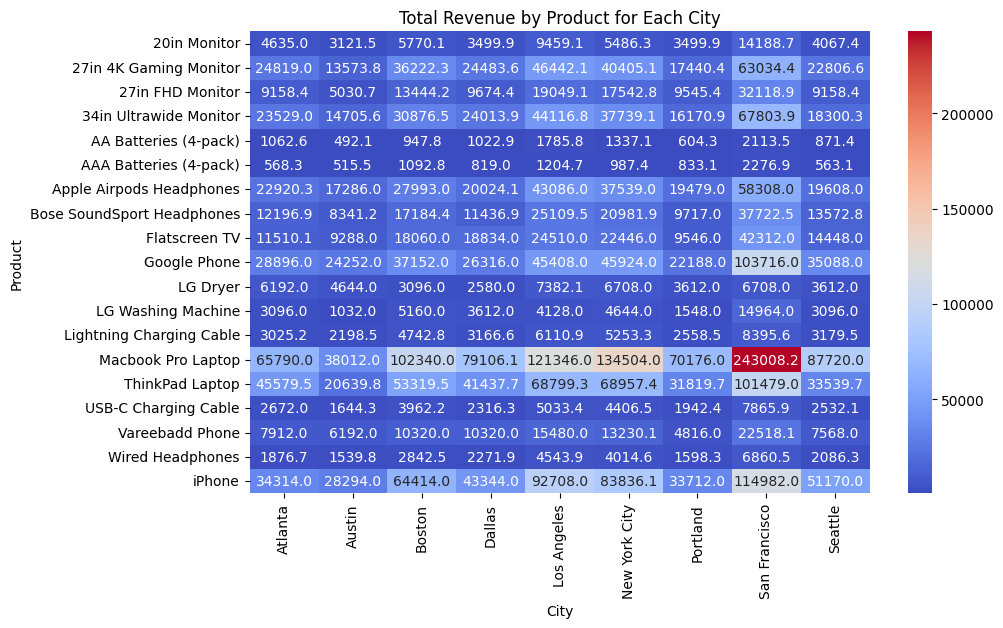

In [278]:
# Calculate total revenue by product for each city
total_revenue_by_product_city = df.groupby(['Product', 'City'])['profit'].sum().reset_index()
top_revenue_city=total_revenue_by_product_city.sort_values(by='profit', ascending=False)
# visualise the total revenue by product for each city
px.bar(top_revenue_city, x='Product', y='profit', color='City', title='Total Revenue by Product for Each City')
# make a heat map to display the total revenue by product for each city
pivot_table = total_revenue_by_product_city.pivot(index='Product', columns='City', values='profit')
pivot_table.head()
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
plt.title('Total Revenue by Product for Each City')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.xlabel('City')
plt.ylabel('Product')
plt.show()


In [256]:
total_revenue_by_product_city.head()

,Product,City,profit
0,20in Monitor,Atlanta,4634.9786
1,20in Monitor,Austin,3121.5162
2,20in Monitor,Boston,5770.0754
3,20in Monitor,Dallas,3499.8818
4,20in Monitor,Los Angeles,9459.1400


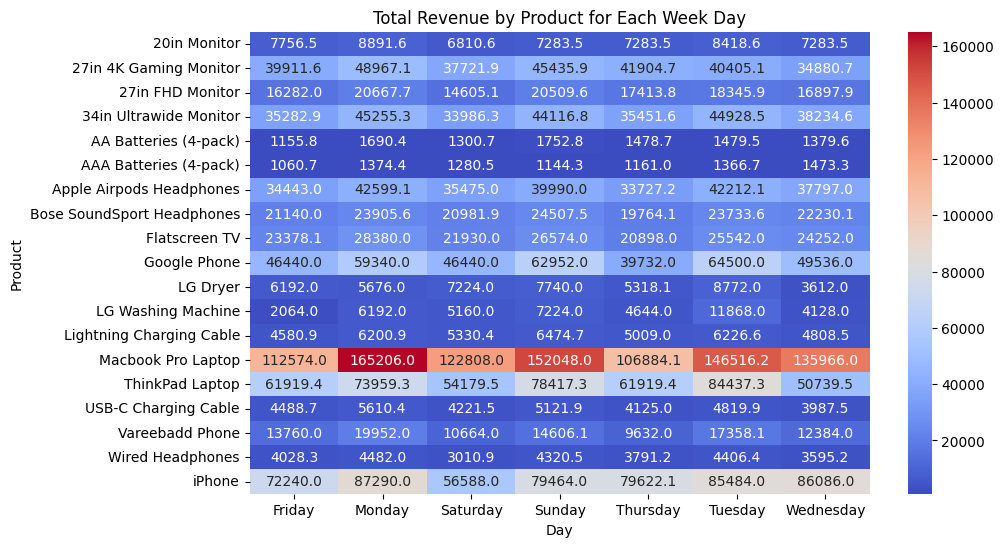

In [281]:
# Calculate total revenue by product for each day of the week
total_revenue_by_product_day = df.groupby(['Product', 'Day'])['profit'].sum().reset_index()

# # Visualize the total revenue by product for each week day using a bar chart
# fig = px.bar(total_revenue_by_product_day, x='Product', y='profit', color='Day',
#              title='Total Revenue by Product for Each Week Day',
#              labels={'x': 'Product', 'y': 'Total Revenue'})
# fig.show()

# Create a pivot table for the heatmap
pivot_table = total_revenue_by_product_day.pivot(index='Product', columns='Day', values='profit')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
plt.title('Total Revenue by Product for Each Week Day')
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.xlabel('Day')
plt.ylabel('Product')
plt.show()

In [283]:
# calculate the profit for each city    
total_revenue_by_city = df.groupby('City')['profit'].sum().reset_index()
px.bar(total_revenue_by_city, x='City', y='profit', color='City', title='Total Revenue by City')

In [285]:
# calculate the profit for each day of the week
profit_by_day = df.groupby('Day')['profit'].sum().reset_index()
#sorting 
profit_by_day = profit_by_day.sort_values(by='profit', ascending=False)
px.bar(profit_by_day, x='Day', y='profit', color='Day', title='Total Revenue by Day')

In [286]:
df.to_csv('Sales_cleaned.csv',index=False)